In [17]:
import pandas as pd

reddit_data_path = 'reddit_data.csv'

df = pd.read_csv(reddit_data_path)


print("Reddit Data Sample:")
df = df[['text', 'topic']].dropna()
df['topic'].value_counts()
df

Reddit Data Sample:


,text,topic
0,Thanks! Not sure if those links were up there ...,pcmasterrace
1,I think its unlikely someone would kill them s...,news
2,Hoult is another one that's important.\n\nBut ...,movies
3,Can have my opinion.\n\nThey're noisy and hot....,pcmasterrace
4,Nice! That reminds me of a more recent article...,news
...,...,...
39996,But aren't most of the illegal immigrants Cath...,news
39997,Yes because she held him down and forced the c...,news
39998,Six String Samurai is one of my favorite movie...,movies
39999,nah this is the kind of comments you get when ...,nfl


In [19]:
# dataset imbalanced dakhacche. needs to put equal number of types with max length of string size
df[df['topic']=='nfl'].sort_values(by="text", key=lambda x: x.str.len())
df2 = df[df['topic']=='news'][:4500]
df3 = df[df['topic']=='pcmasterrace'][:4500]
df4 = df[df['topic']=='movies'][:4500]
df5 = df[df['topic']=='relationships'][:4500]


In [16]:
df1

<ipython-input-16-98f89515c440>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by="text",key=lambda x:x.str.len(),inplace=True)


,text,topic
14872,Because if he has the opportunity to go back i...,nfl
24397,The question is more asking who is in rebuildi...,nfl
13181,"Due to all the pushing back of cap hits. Also,...",nfl
25123,He almost won me my fantasy IDP league last ye...,nfl
15769,Well... Well... Luck... is... FUCK YOU [Come o...,nfl
...,...,...
31259,**1973: The Curse of the Yale Bowl**\n\nNorm ...,nfl
36198,Jordan Matthews W01 v JAX \n ...,nfl
6103,Can we as a group now stop talking about it an...,nfl
404,"TLDR; ""We do not believe evidence supports a c...",nfl


In [24]:
reddit_df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [25]:
reddit_df = reddit_df.sample(frac=1.0, random_state=42).dropna()
reddit_df.reset_index(drop=True, inplace=True)
print(reddit_df)


                                                    text          topic
0                Yea probably, can't disagree with that             nfl
1      &gt;Solar and wind just don't cut it folks\n\n...           news
2                                    What does NC mean?   relationships
3      "Police seem to justify their killings with nu...           news
4      Probably will. The specs say any reference sty...   pcmasterrace
...                                                  ...            ...
21559  Ah, in the case of not having a nvidia gpu the...   pcmasterrace
21560  This is why I have been so drained lately, but...  relationships
21561  I actually saw a headline earlier today: "Just...           news
21562  What do you mean defensive??!?! No we're not. ...            nfl
21563  i wanted subtitles so bad.  I did have it on m...         movies

[21564 rows x 2 columns]


In [26]:
reddit_df.iloc[4]

text     Probably will. The specs say any reference sty...
topic                                         pcmasterrace
Name: 4, dtype: object

In [27]:

duplicate_count = reddit_df.duplicated().sum()

reddit_df = reddit_df.drop_duplicates()

unique_entries_count = reddit_df.shape[0]

print(f"Total entries before removing duplicates: {unique_entries_count + duplicate_count}")
print(f"Duplicate entries found: {duplicate_count}")
print(f"Total unique entries after removing duplicates: {unique_entries_count}")


Total entries before removing duplicates: 21564
Duplicate entries found: 44
Total unique entries after removing duplicates: 21520


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
        preprocessed_text = ' '.join(filtered_tokens)
        return preprocessed_text
    else:
        return ''

reddit_df['text'] = reddit_df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
reddit_df['topic'].value_counts()

pcmasterrace     4402
movies           4380
nfl              4372
news             4198
relationships    4168
Name: topic, dtype: int64

In [30]:
reddit_df.shape

(21520, 2)

In [31]:
# Used stemming here.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
reddit_df['text'] = reddit_df['text'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))


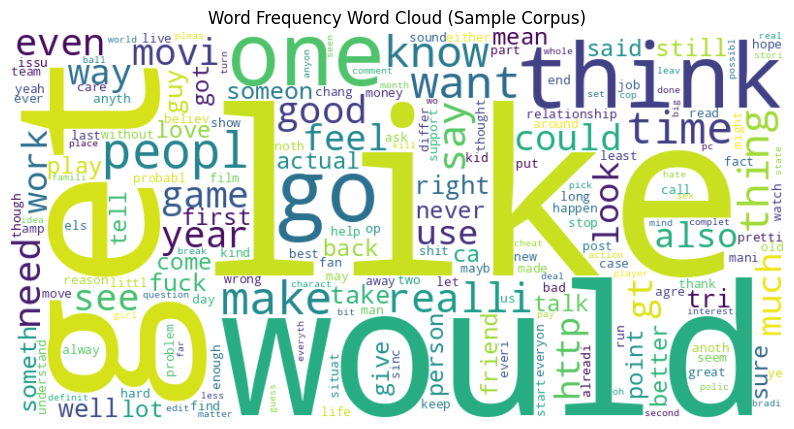

In [32]:
# visualizing frequency of words
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

corpus = reddit_df.text.tolist()[:]
words = re.findall(r'\b\w+\b', ' '.join(corpus).lower())
word_freq = Counter(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Frequency Word Cloud (Sample Corpus)")
plt.show()

In [17]:
len(word_freq.items())

24077

In [33]:
# Etto boro vocablist. katchat kora dorkar
# 24 percent shamner theke 24 percent pechon theke bad dite hbe jodi vocab komaite chai
def tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words
def zipfs_law_filter(keep_percentage,word_freq):
    total_words = len(word_freq)
    cutoff = int((keep_percentage/100) * total_words)
    word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
    # least_frequent_words = list(word_freq.keys())[:]
    least_frequent_words = list(word_freq.keys())[-cutoff:]
    word_freq = {word: count for word, count in word_freq.items() if word not in least_frequent_words}
    return word_freq

word_freq = zipfs_law_filter(50,word_freq)

In [34]:
len(word_freq)

12039

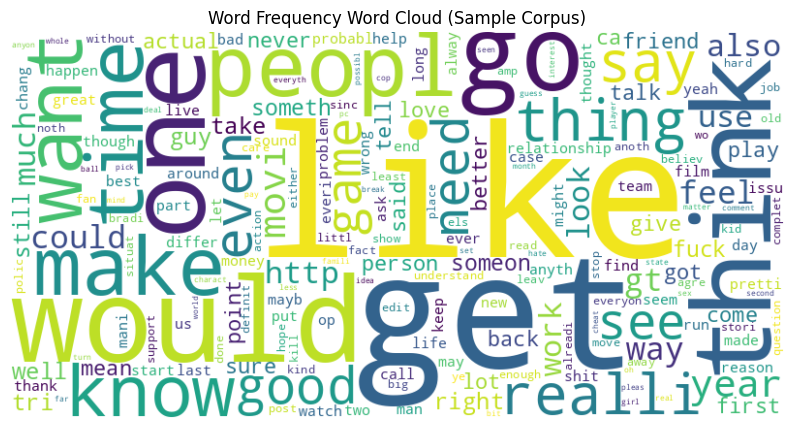

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Frequency Word Cloud (Sample Corpus)")
plt.show()

In [36]:
reddit_df['text'] = reddit_df['text'].apply(lambda text: ' '.join([word for word in text.split() if word in word_freq]))


In [37]:
len(word_freq)

12039

# Nicely Explained https://www.youtube.com/watch?v=zLMEnNbdh4Q

In [38]:
term_fin = set(word_freq)

In [39]:
reddit_df = reddit_df[reddit_df['text'].str.len() > 0]
reddit_df.shape

(21278, 2)

In [40]:
reddit_df.reset_index(drop=True, inplace=True)


In [41]:
from tqdm import tqdm
import numpy as np
import re
mat = []
for text in tqdm(reddit_df['text'], total=len(reddit_df)):
    words = text.split()
    tf_per_doc = []
    total_words = len(words)
    for term in word_freq:
        term_count = words.count(term)
        tf_per_doc.append(term_count/total_words)
    mat.append(tf_per_doc)
tf_mat = np.array([list(row) for row in zip(*mat)])

100%|██████████| 21278/21278 [03:27<00:00, 102.68it/s]


In [42]:
tf_mat.shape

(12039, 21278)

In [43]:
import math
num_of_docs = len(reddit_df)
corpus_of_txt = reddit_df.text.tolist()
idf_mat = []
for word in word_freq:
    txt_in_total_docs = sum(1 for sentence in corpus_of_txt if word in sentence)
#     print(txt_in_total_docs)
    idf_mat.append(math.log10(num_of_docs/txt_in_total_docs))
idf_mat = np.array(idf_mat)

In [44]:
idf_mat.shape

(12039,)

In [45]:
tf_idf = np.empty(tf_mat.shape)
for i in range(tf_mat.shape[0]):
    tf_idf[i, :] = tf_mat[i, :] * idf_mat[i]

In [46]:
tf_idf.shape

(12039, 21278)

In [47]:
tf_idf = tf_idf.T

In [48]:
tf_idf.shape

(21278, 12039)

In [49]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tf_idf)
cluster_assignments = kmeans.labels_
# from sklearn.metrics import adjusted_rand_score
# ari = adjusted_rand_score(y_train, cluster_assignments)
# print(f"Adjusted Rand Index (ARI): {ari}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
from sklearn.metrics import adjusted_rand_score
y = reddit_df.topic.tolist()
reddit_df['cluster'] = cluster_assignments

In [51]:
d = {
       'text':reddit_df['text'].tolist(),
       'topic':reddit_df['topic'].tolist(),
       'cluster':reddit_df['cluster'].tolist()
}
df = pd.DataFrame(d)

In [52]:
df['cluster'].shape

(21278,)

In [53]:
df['cluster'].value_counts()

2    21090
0      180
1        6
3        1
4        1
Name: cluster, dtype: int64

In [54]:
import numpy as np
num_clusters = 5
cluster_assignments = df['cluster']
cluster_centroids = []
for cluster_id in range(5):
    cluster_points = tf_idf[cluster_assignments == cluster_id]
    centroid = np.mean(cluster_points, axis=0)
    cluster_centroids.append(centroid)
davies_bouldin_index = 0
for i in range(5):
    max_similarity = 0

    for j in range(5):
        if i != j:
            similarity = np.linalg.norm(cluster_centroids[i] - cluster_centroids[j]) / (
                        np.std(tf_idf[cluster_assignments == i]) + np.std(
                    tf_idf[cluster_assignments == j]))
            if max_similarity < similarity:
                max_similarity = similarity

    davies_bouldin_index += max_similarity
davies_bouldin_index /= num_clusters

print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 82.70970054444177


In [55]:
from collections import Counter
cluster_assignments = df['cluster']
true_labels = df['topic']

def calculate_purity(cluster_assignments, true_labels):
    num_samples = len(cluster_assignments)
    purity = 0
    for cluster_id in np.unique(cluster_assignments):
        cluster_indices = np.where(cluster_assignments == cluster_id)[0]
        cluster_label_counts = Counter(true_labels[cluster_indices])
        majority_class = cluster_label_counts.most_common(1)[0][0]
        majority_count = cluster_label_counts[majority_class]
        purity += majority_count
    purity /= num_samples
    return purity

purity_score = calculate_purity(cluster_assignments, true_labels)
print(f"Purity: {purity_score}")

Purity: 0.20504746686718678


In [56]:
clustr = pd.DataFrame({'cluster':df.cluster.tolist()})

In [57]:
clustr.shape

(21278, 1)

In [58]:
clustr.shape

(21278, 1)

In [61]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
num_samples = 1000
random_indexes = np.random.choice(df.index[:5000], num_samples, replace=False)
subset_data = tf_idf[random_indexes]
subset_assignments = df['cluster'][random_indexes]
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(subset_data)



In [64]:
df = pd.DataFrame({
    'x': tsne_results[:, 0],
    'y': tsne_results[:, 1],
    'z': tsne_results[:, 2],
    'cluster':subset_assignments.tolist()
})

fig = go.Figure()

centroids = []
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    centroid = cluster_data[['x', 'y', 'z']].mean().values
    centroids.append(centroid)

centroids = np.array(centroids)

cluster_colors = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'orange',
}

marker_size = 4

for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['x'],
        y=cluster_data['y'],
        z=cluster_data['z'],
        mode='markers',
        marker=dict(
            size=marker_size,
            opacity=0.6,
            color=cluster_colors[cluster],
        ),
        name=f'Cluster {cluster}'
    ))

centroid_marker_size = 10
for cluster in df['cluster'].unique():
    centroid = centroids[cluster]
    fig.add_trace(go.Scatter3d(
        x=[centroid[0]],
        y=[centroid[1]],
        z=[centroid[2]],
        mode='markers',
        marker=dict(
            size=centroid_marker_size,
            opacity=1.0,
            symbol='cross',
            color=cluster_colors[cluster],
        ),
        name=f'Centroid {cluster}'
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

2    989
0     11
Name: cluster, dtype: int64

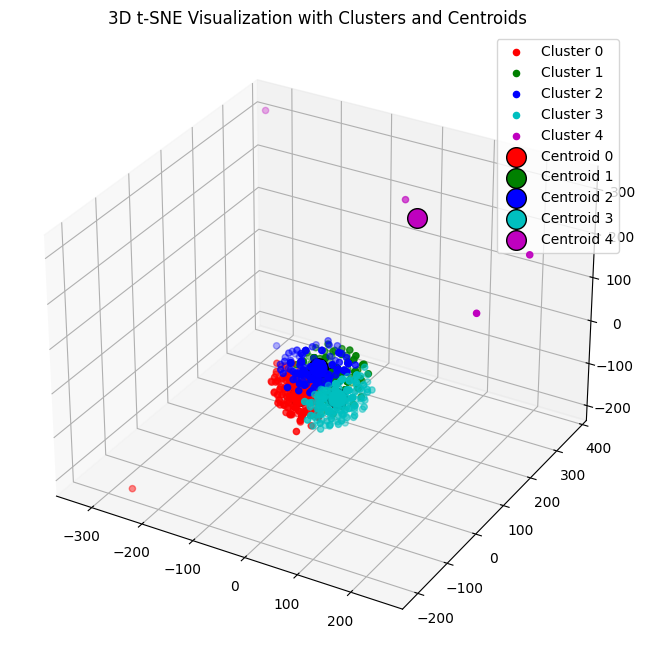

In [56]:

fig.set_title('3D t-SNE Visualization with Clusters and Centroids')
fig.legend()
fig.show()